In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import layoutparser as lp
import cv2
import os
import pdf2image
from extracttools import find_part3_rng

In [2]:
# configuration
print(lp.__version__)
print(lp.is_detectron2_available())

0.3.4
True


In [4]:
pdf_url = '../extracted/12-NewLucena2013_Part3-Status_of_Implementation.pdf'

In [5]:
find_part3_rng(pdf_url)

'0-end'

In [6]:
image_pdf = pdf2image.convert_from_path(pdf_url)

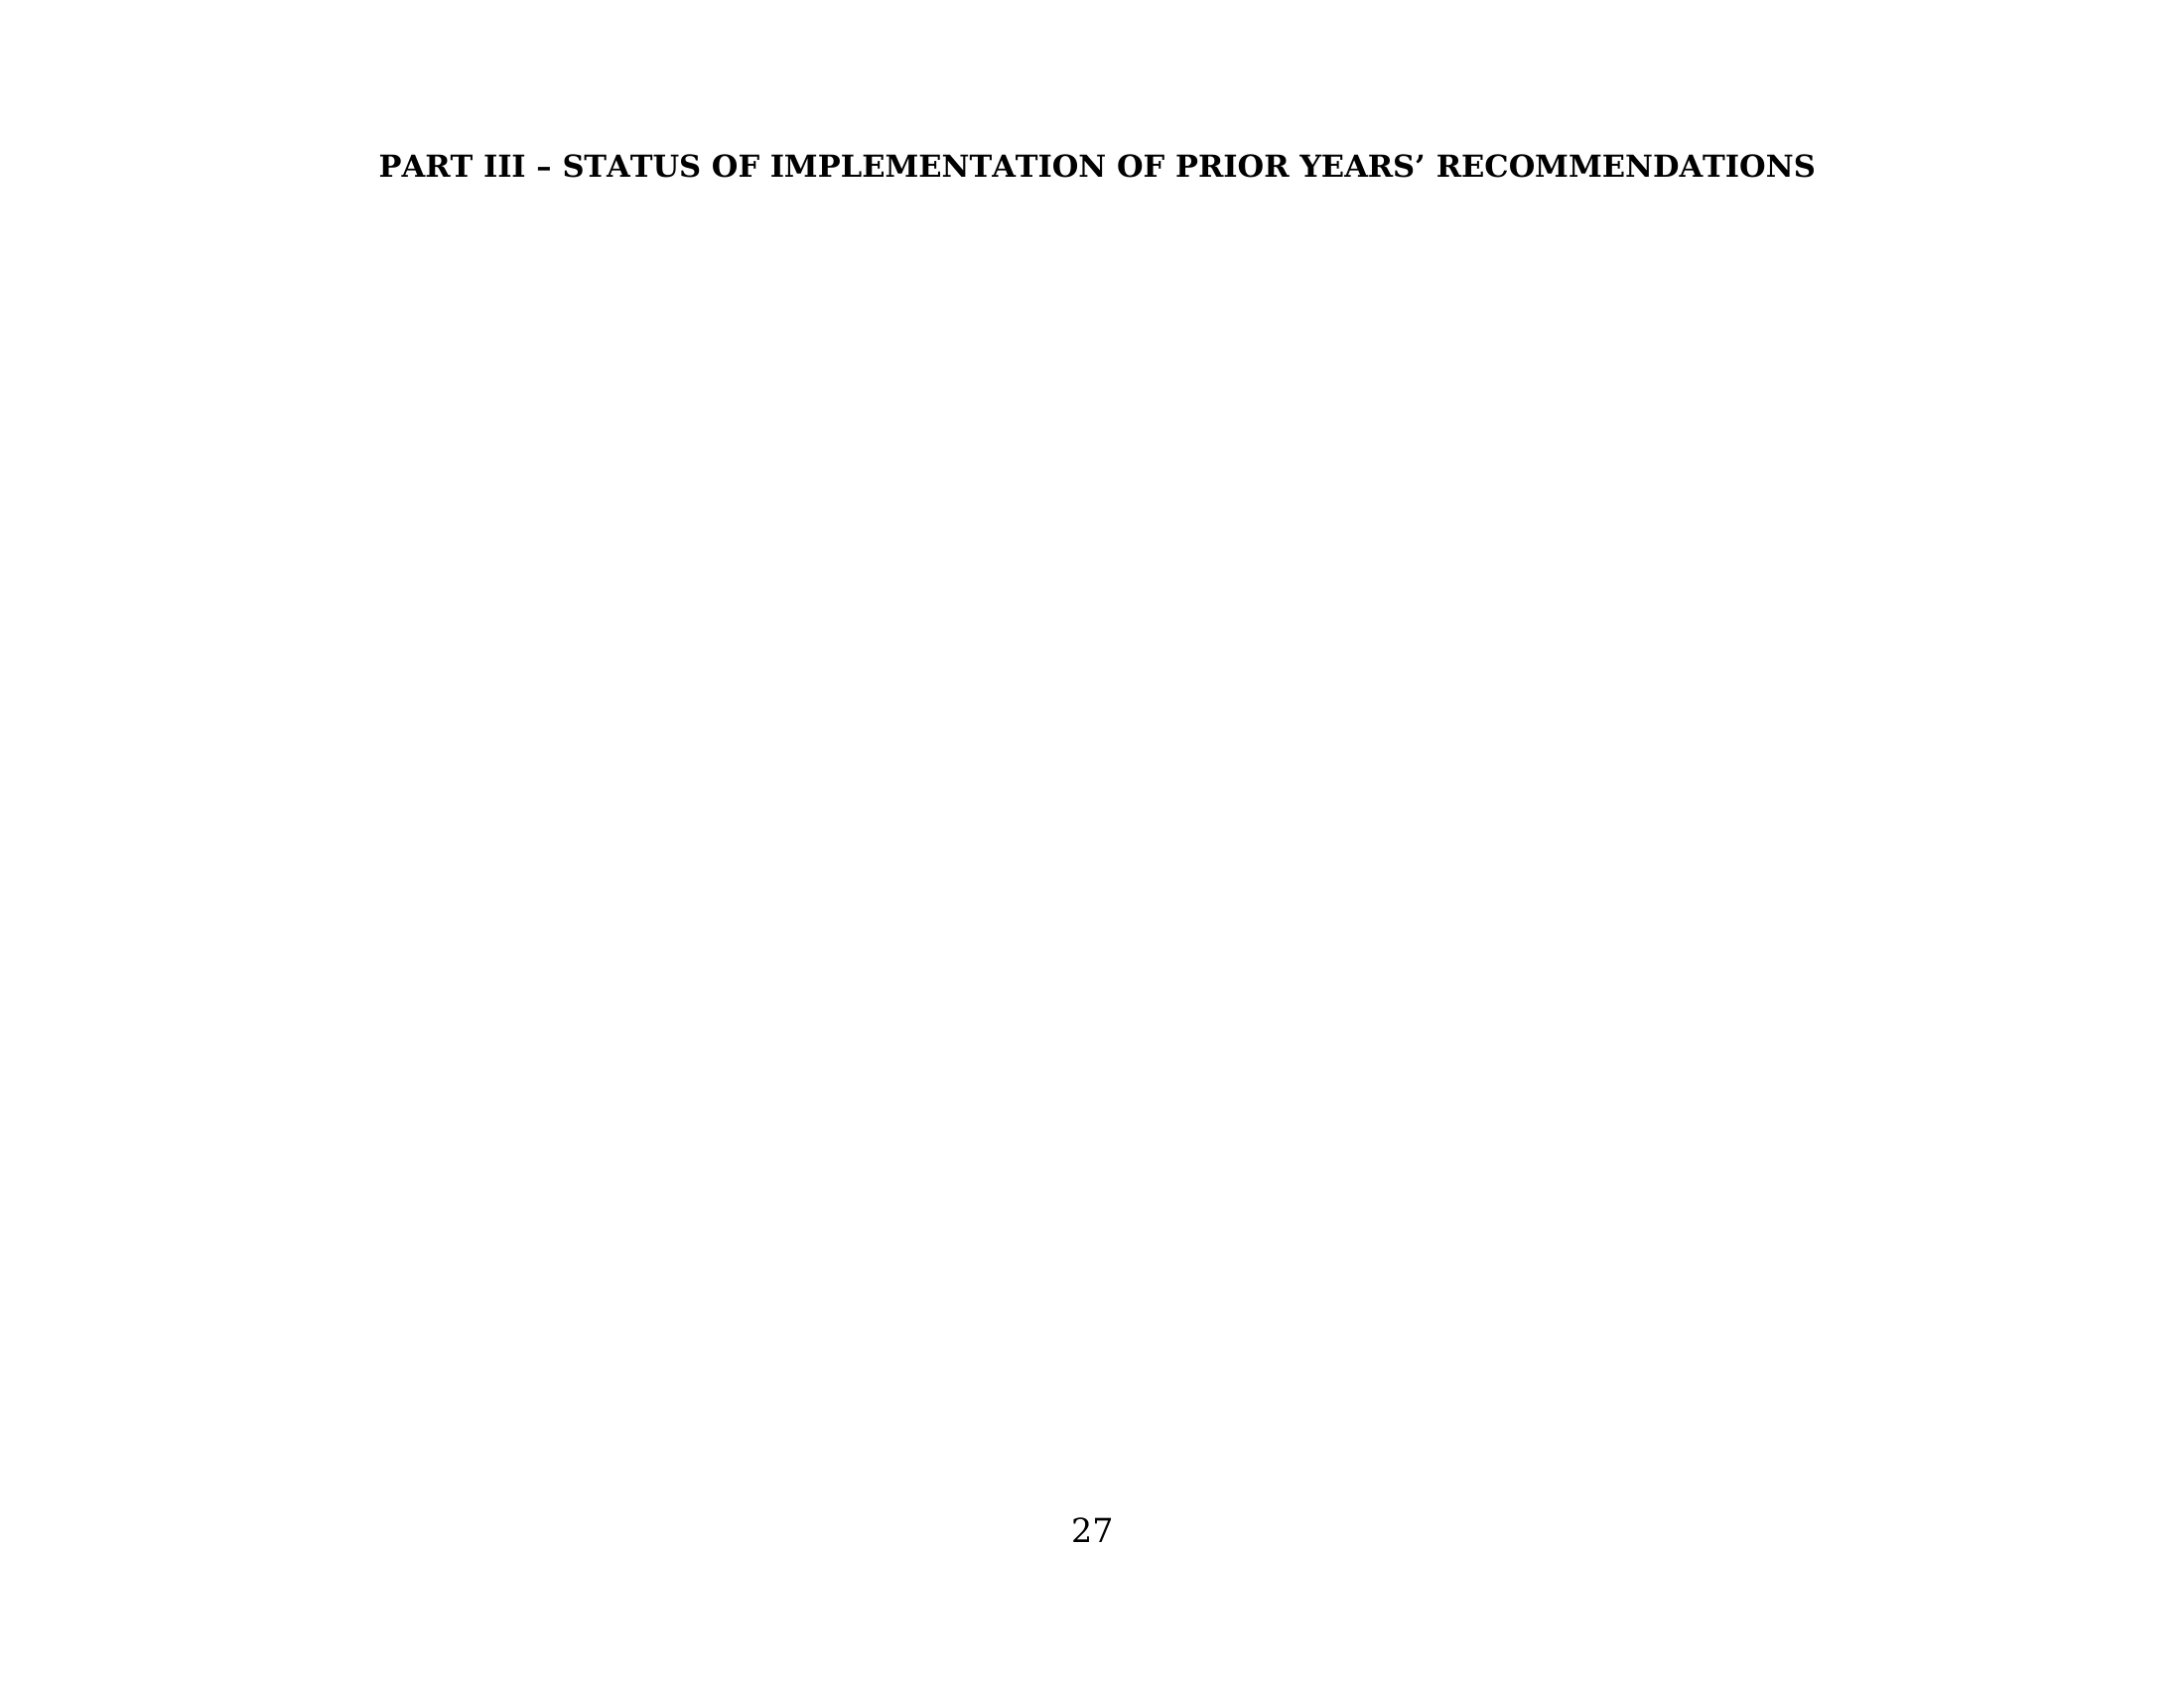

In [7]:
image_pdf[0]

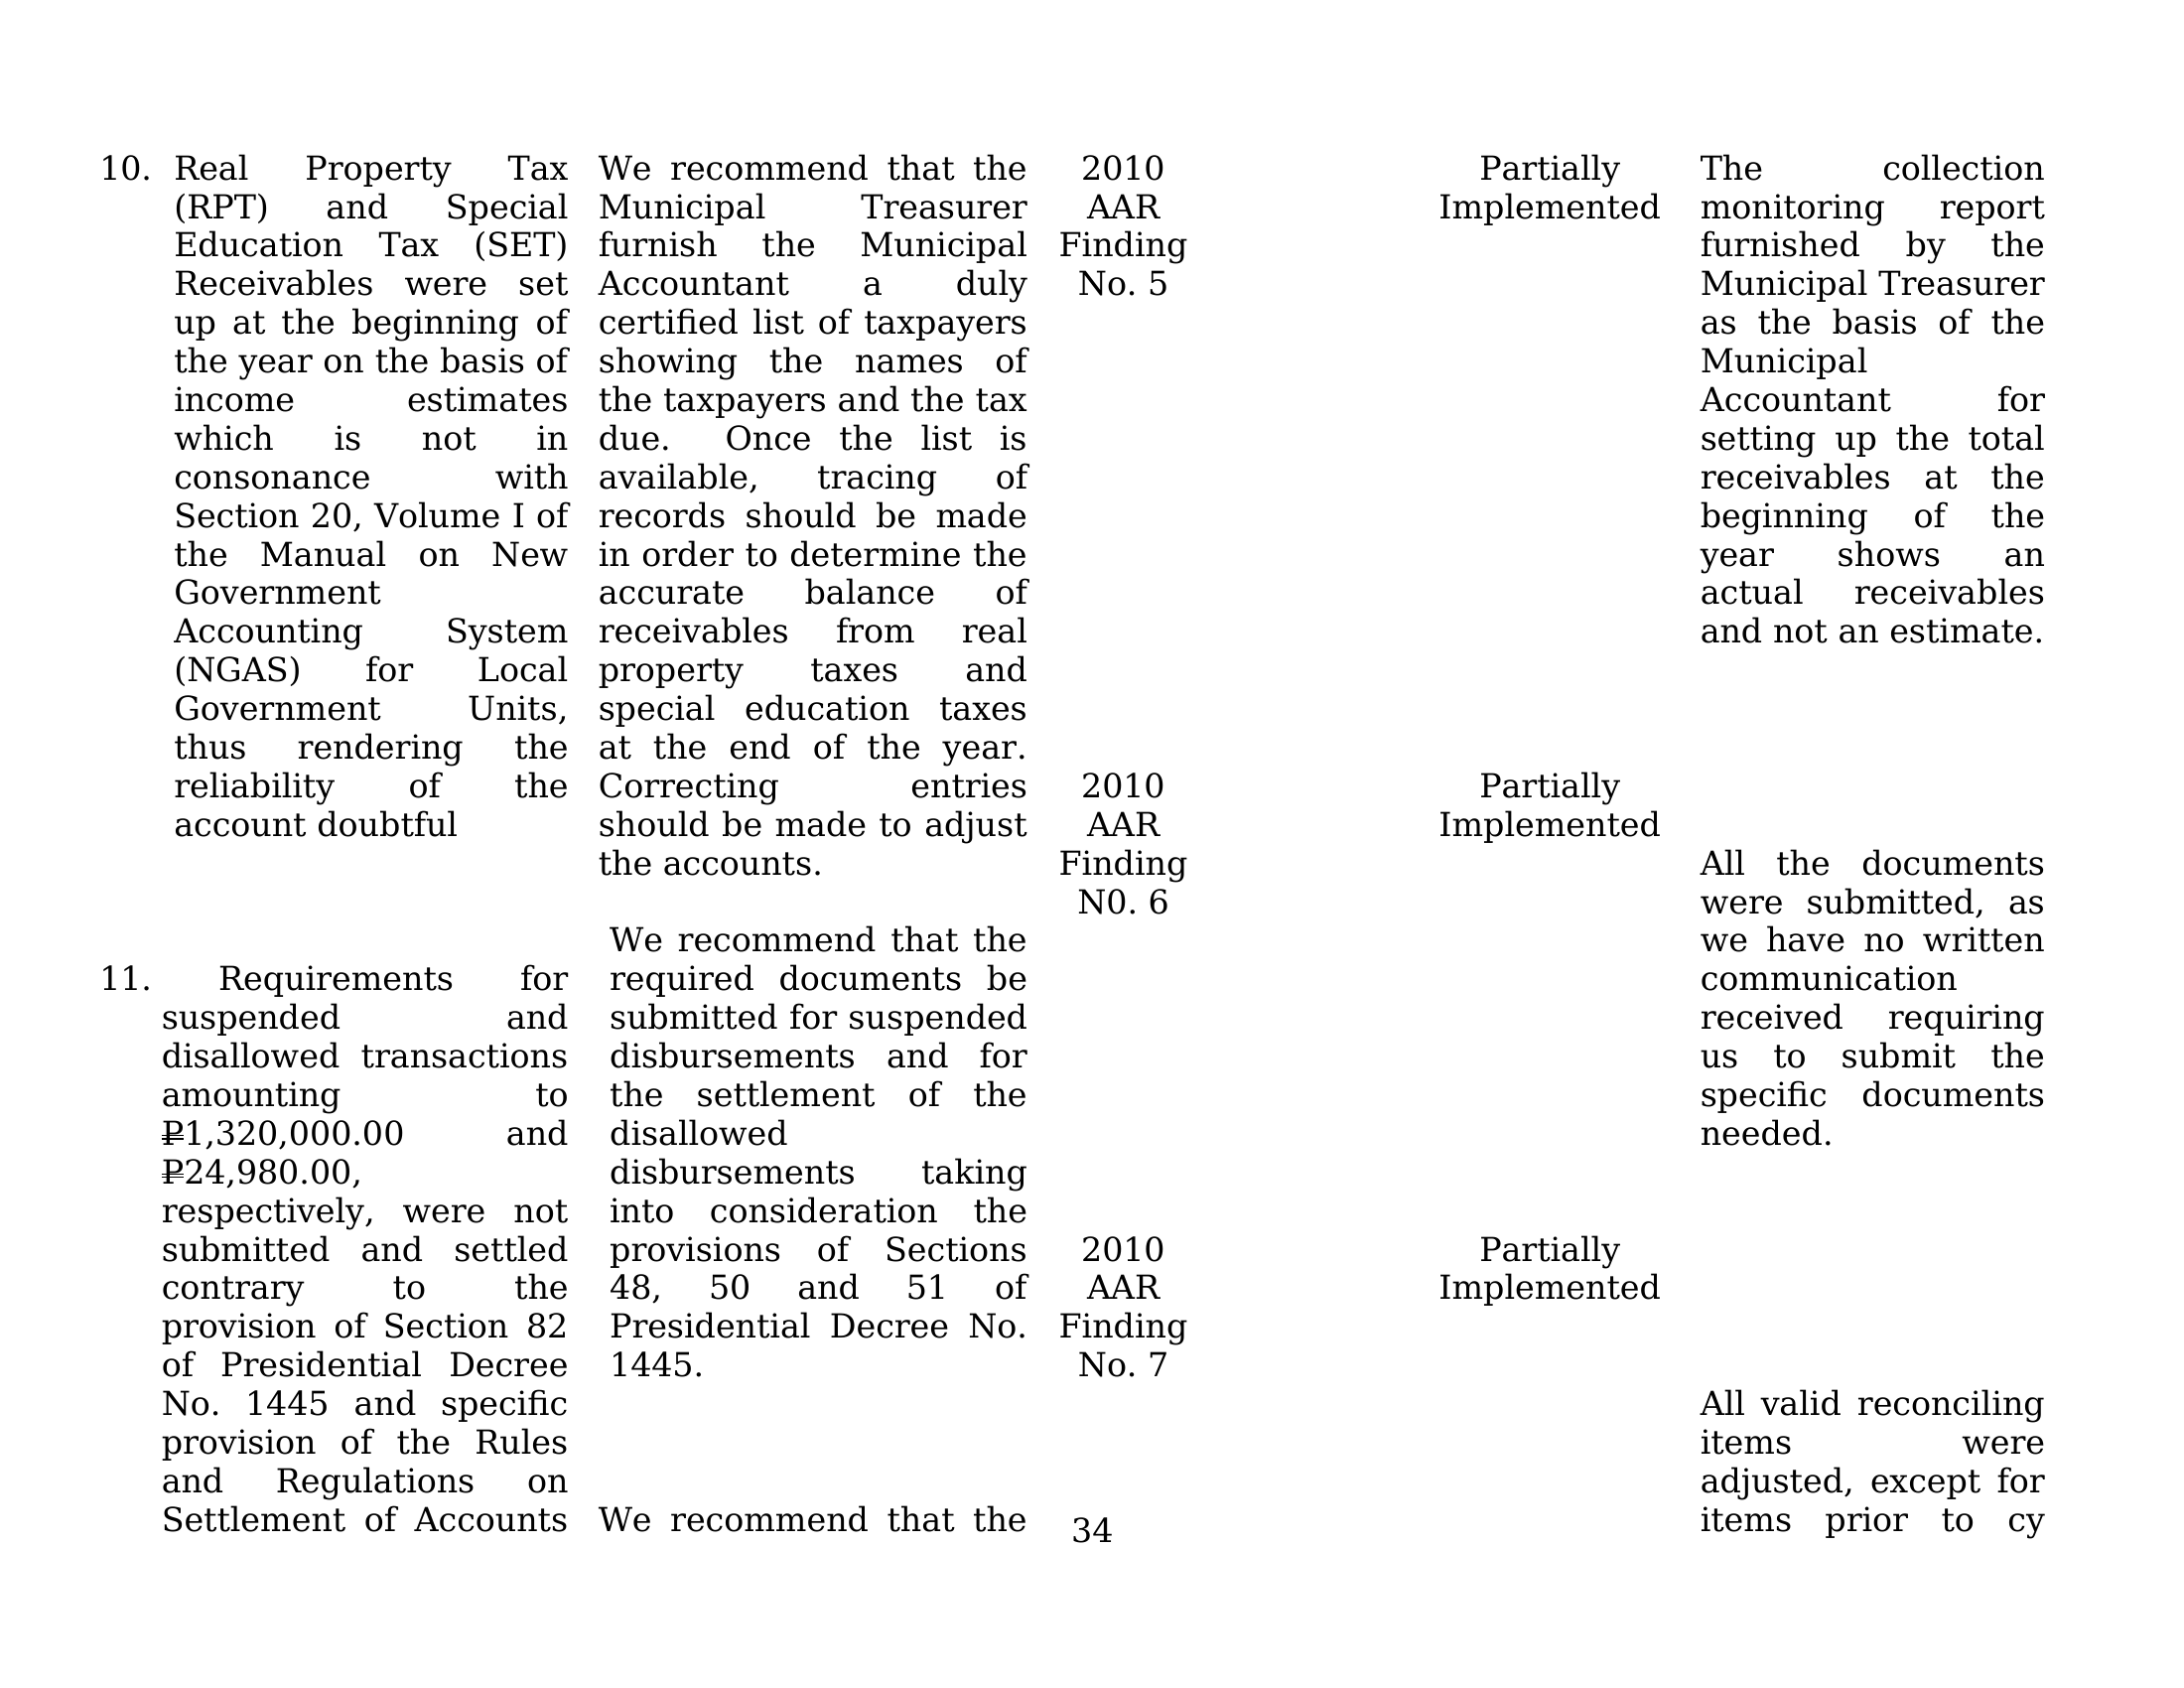

In [8]:
image_pdf[-2]

In [9]:
image_pdf[-2].save('test.png')

In [11]:
model = lp.Detectron2LayoutModel(
    'lp://PubLayNet/mask_rcnn_R_50_FPN_3x/config',
    label_map={0: "Text", 1: "Title", 2: "List", 3:"Table", 4:"Figure"},
)

In [12]:
layout = model.detect(image_pdf[-2])

/Users/jackvaughan/Documents/DS/PhilippinesAuditSystem/.venv/lib/python3.8/site-packages/torch/functional.py:504: UserWarning: torch.meshgrid: in an upcoming release, it will be required to pass the indexing argument. (Triggered internally at /Users/runner/work/pytorch/pytorch/pytorch/aten/src/ATen/native/TensorShape.cpp:3484.)
  return _VF.meshgrid(tensors, **kwargs)  # type: ignore[attr-defined]


In [13]:
layout

Layout(_blocks=[TextBlock(block=Rectangle(x_1=131.90582275390625, y_1=127.49980163574219, x_2=1277.3265380859375, y_2=1550.414794921875), text=None, id=None, type=Figure, parent=None, next=None, score=0.9309282898902893), TextBlock(block=Rectangle(x_1=124.87326049804688, y_1=156.59625244140625, x_2=1035.463623046875, y_2=919.5831909179688), text=None, id=None, type=Figure, parent=None, next=None, score=0.8738803267478943), TextBlock(block=Rectangle(x_1=1704.033203125, y_1=162.44647216796875, x_2=2061.658935546875, y_2=670.5994873046875), text=None, id=None, type=Figure, parent=None, next=None, score=0.7285345196723938), TextBlock(block=Rectangle(x_1=1195.0487060546875, y_1=106.51627349853516, x_2=2062.81103515625, y_2=1589.17333984375), text=None, id=None, type=Figure, parent=None, next=None, score=0.6469625234603882), TextBlock(block=Rectangle(x_1=46.89289474487305, y_1=141.74505615234375, x_2=2010.2222900390625, y_2=1580.369384765625), text=None, id=None, type=Table, parent=None, nex

In [15]:
tables = [l for l in layout if l.type == 'Table']
tables

[TextBlock(block=Rectangle(x_1=46.89289474487305, y_1=141.74505615234375, x_2=2010.2222900390625, y_2=1580.369384765625), text=None, id=None, type=Table, parent=None, next=None, score=0.35247430205345154),
 TextBlock(block=Rectangle(x_1=140.84716796875, y_1=141.95860290527344, x_2=1195.5751953125, y_2=1427.443359375), text=None, id=None, type=Table, parent=None, next=None, score=0.11736513674259186),
 TextBlock(block=Rectangle(x_1=150.69155883789062, y_1=182.29660034179688, x_2=1041.3411865234375, y_2=895.2276000976562), text=None, id=None, type=Table, parent=None, next=None, score=0.08757844567298889),
 TextBlock(block=Rectangle(x_1=1112.346923828125, y_1=171.56910705566406, x_2=2062.115234375, y_2=1545.7421875), text=None, id=None, type=Table, parent=None, next=None, score=0.05114186555147171)]

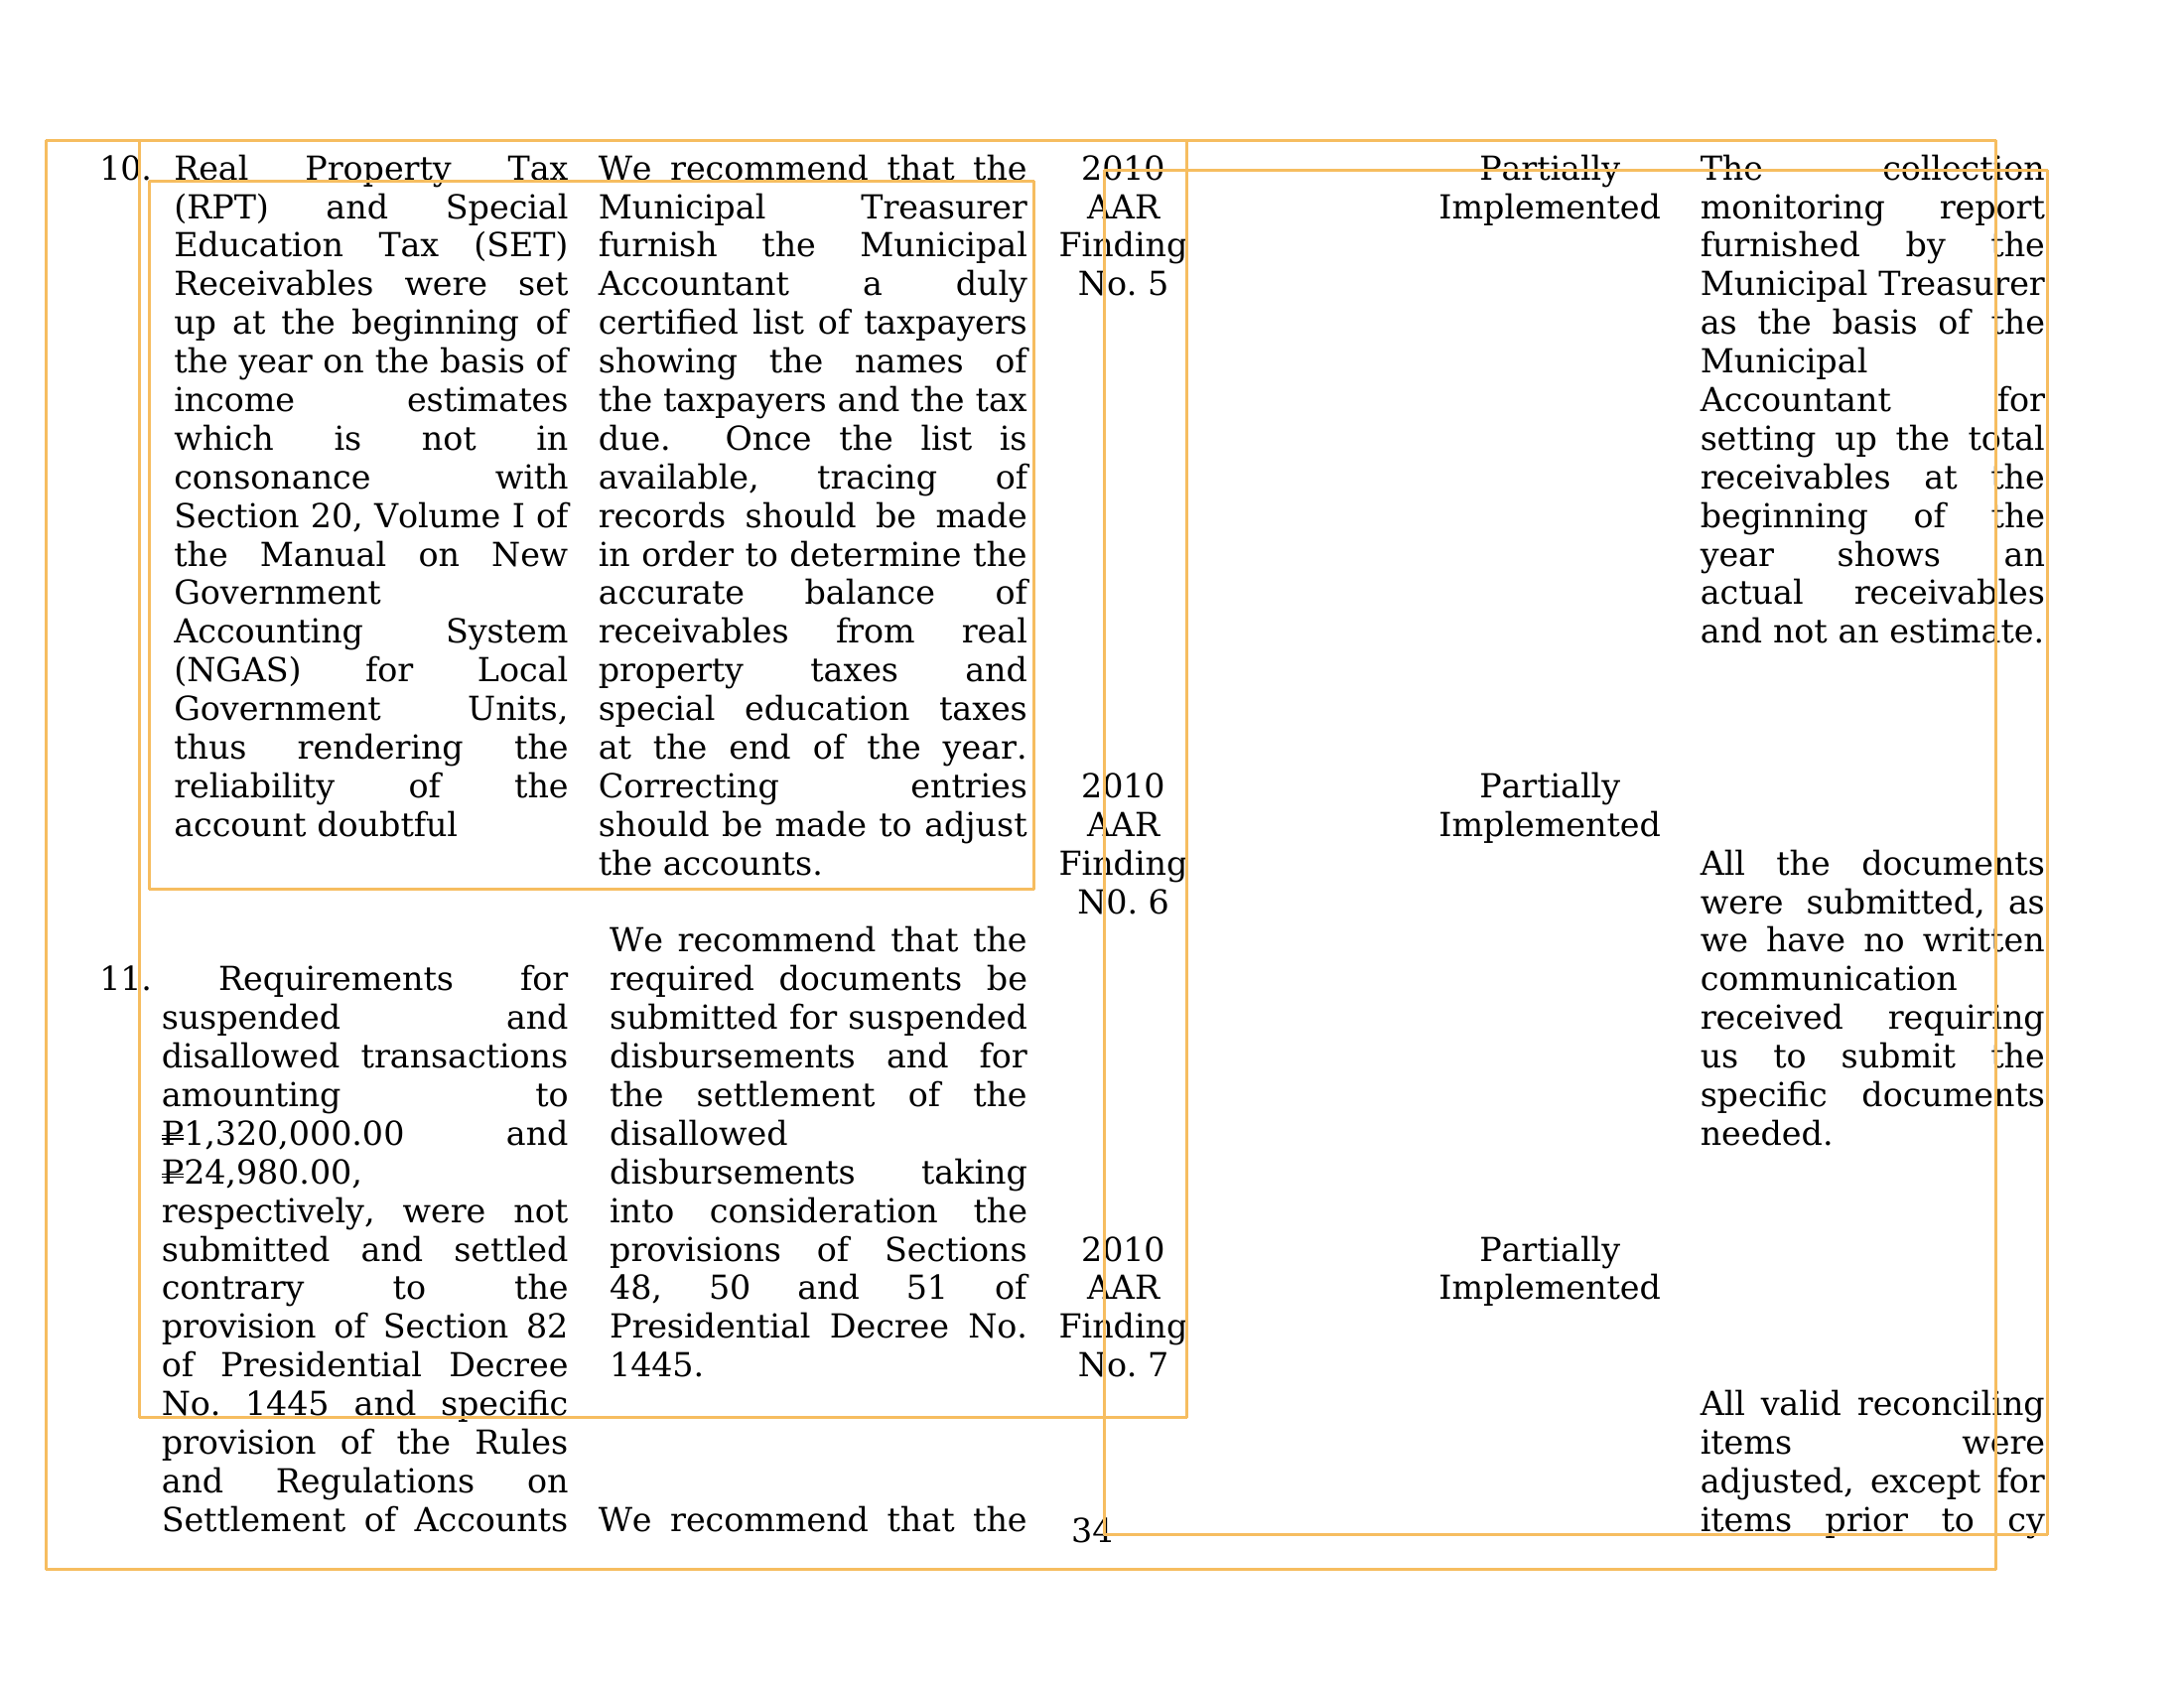

In [16]:
lp.draw_box(image_pdf[-2], tables, box_width=3)

In [11]:
width, height = target_pages[1].size